Importing packages

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
font={'size':14}
matplotlib.rc('font',**font)

Load salsa data(galactic longitude 25-210 degrees). The data is gausian fitted from fits files using salsaj software and combined into one text file. The fits data was recorded using the SALSA 2.3m telescope controlled remotely in sweeden

In [88]:
salsa=np.loadtxt("data.txt")

Limit data to the first galaxy quadrant(25-80 degrees) with max recorded relative velocity for ploting the rotation curve

In [89]:
rcurve_data=np.empty([1,2],dtype='float32')
for j in range(25,85,5):
    for i in range(salsa.shape[0]):
        if salsa[i,0]==j:
            val1=salsa[i,0].copy()
            val2=salsa[i,1].copy()
            l=np.array([val1,val2])          
    rcurve_data=np.vstack([rcurve_data,l])
rcurve_data=rcurve_data[1::]

           

Define a function to convert degrees into radians

In [90]:
def radians(x):
    return ((np.pi*x)/180)

Convert all degree values in rotation curve data into radians

In [91]:
for i in range(rcurve_data.shape[0]):
    rcurve_data[i,0]=radians(rcurve_data[i,0])


Define a function that returns rotation radius from given galactic longitude

In [92]:
def ro_radius(x):
    return (8.5 * np.sin(x))


Define a function that returns rotation velocity from given galactic longitude and max measured relatve velocity

In [93]:
def ro_velocity(l,x):
    return (x+(220*np.sin(l)))

Evaluate rotation radius for all galactic longitude

In [94]:
rotation_radius=np.empty([1,1])
for i in range(rcurve_data.shape[0]):
    radius=ro_radius(rcurve_data[i,0].copy())
    rotation_radius=np.vstack([rotation_radius,radius])
rotation_radius=rotation_radius[1::]

Evaluate rotation velocity for all galactic longitude and relative velocity

In [95]:
rotation_velocity=np.empty([1,1])
for i in range(rcurve_data.shape[0]):
    velocity=ro_velocity(rcurve_data[i,0].copy(),rcurve_data[i,1].copy())
    rotation_velocity=np.vstack([rotation_velocity,velocity])
    
rotation_velocity=rotation_velocity[1::]

Combine rotation radius and rotation velocity to make rotation curve plot data

In [96]:
rotationcurve_plot = np.hstack([rotation_radius,rotation_velocity])

Plot the rotation curve data

<function matplotlib.pyplot.show>

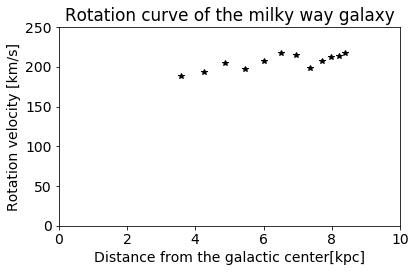

In [97]:
for i in range (rotationcurve_plot.shape[0]):
    r=rotationcurve_plot[i,0]
    v=rotationcurve_plot[i,1]
    plt.plot(r,v,'*k')
plt.axis([0,10,0,250])
plt.title('Rotation curve of the milky way galaxy')
plt.xlabel('Distance from the galactic center[kpc]')
plt.ylabel('Rotation velocity [km/s]')
plt.tight_layout()
plt.show

convet all the degrees in salsa data from 25-210 into radians for mappng the galaxy

In [98]:
for i in range(salsa.shape[0]):
    salsa[i,0]=radians(salsa[i,0])

Define a function to get the rotation radius for a given galactic longitude and relative velocity

In [99]:
def get_rotation_radius(l,v):
    return (8.5*220*np.sin(l))/((220*np.sin(l))+v)

Evaluate the rotation radius at each galactic longitude and vecocity

In [100]:
all_rotation_radius=np.empty([1,1],dtype="float32")
for i in range(salsa.shape[0]):
    a_radius=get_rotation_radius(salsa[i,0],salsa[i,1])
    all_rotation_radius=np.vstack([all_rotation_radius,a_radius])
    
all_rotation_radius=all_rotation_radius[1::]

Add rotation radius column to the salsa data

In [101]:
new_salsa=np.hstack([salsa,all_rotation_radius])

Define functions to convert rotation radius and galactic longitude to carteesian x-y cordinates

In [102]:
def x_value(l,r):
    return (r*np.cos(l-(radians(90))))

def y_value(l,r):
    return (r*np.sin(l-(radians(90))))

Convert rotation radius and galactic longitude to carteesian x-y cordinates

In [103]:
x_y_values=np.empty([1,2],dtype=float)
for i in range(new_salsa.shape[0]):
    x=x_value(new_salsa[i,0],new_salsa[i,2])
    y=y_value(new_salsa[i,0],new_salsa[i,2])
    x_y=np.array([x,y]) 
    x_y_values=np.vstack([x_y_values,x_y])

x_y_values=x_y_values[1::]

Make the center of the galaxy at the origin or skip this to leave the sun at the origin

In [104]:
for i in range(x_y_values.shape[0]):
    x_y_values[i,1]=(x_y_values[i,1])+8.5


Plot the position of the gass clouds in x-y cordinates

<function matplotlib.pyplot.show>

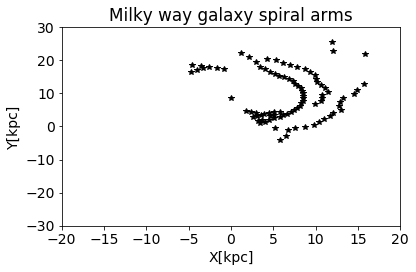

In [105]:
for i in range (x_y_values.shape[0]):
    r=x_y_values[i,0]
    v=x_y_values[i,1]
    plt.plot(r,v,'*k')
plt.axis([-20,20,-30,30])
plt.title('Milky way galaxy spiral arms')
plt.xlabel('X[kpc]')
plt.ylabel('Y[kpc]')
plt.tight_layout()
plt.show